# Library and Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
filename = 'Downloads/predictive_maintenance.csv'
df = pd.read_csv(filename, index_col=None, header=0)

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

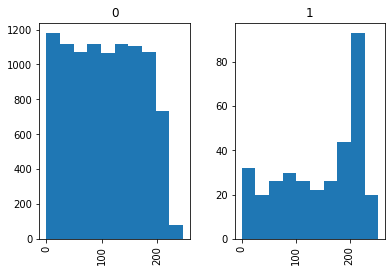

In [5]:
df.hist('Tool wear [min]', by='Target')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

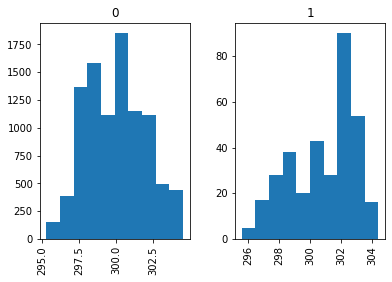

In [114]:
df.hist('Air temperature [K]', by='Target')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

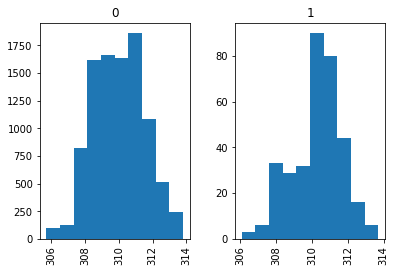

In [115]:
df.hist('Process temperature [K]', by='Target')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

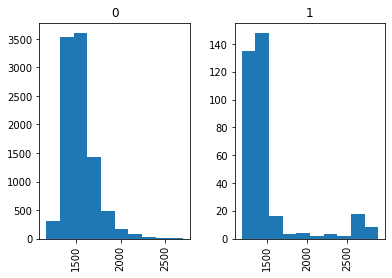

In [116]:
df.hist('Rotational speed [rpm]', by='Target')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

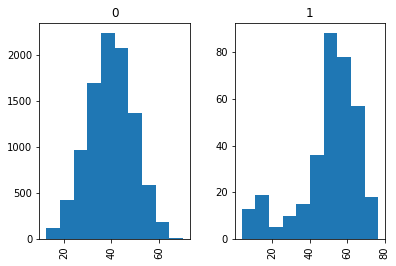

In [117]:
df.hist('Torque [Nm]', by='Target')

In [6]:
df[df['Target']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


<AxesSubplot:>

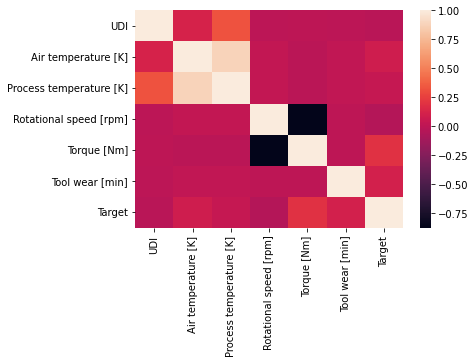

In [79]:
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

# Overall Survival Curve

In [7]:
import lifelines

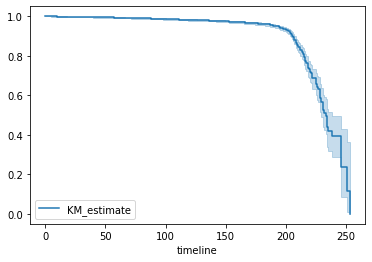

In [8]:
from lifelines import KaplanMeierFitter

# Instantiate a KaplanMeierFitter object kmf
kmf = KaplanMeierFitter()

# Fit the KaplanMeierFitter object to the data
kmf.fit(durations=df['Tool wear [min]'], 
        event_observed=df['Target'])

# Visualize and show the survival curve
kmf.plot_survival_function()
plt.show()

In [9]:
print(kmf.median_survival_time_)

233.0


In [13]:
kmf.survival_function_.tail(20)

,KM_estimate
timeline,
227.0,0.631610
228.0,0.588789
229.0,0.566143
230.0,0.566143
231.0,0.525704
232.0,0.510684
233.0,0.494725
234.0,0.437641
235.0,0.418614


# Survival by Type

In [18]:
high_machine = df[df['Type'] == "H"]
medium_machine = df[df['Type'] == "M"]
low_machine = df[df['Type'] == "L"]

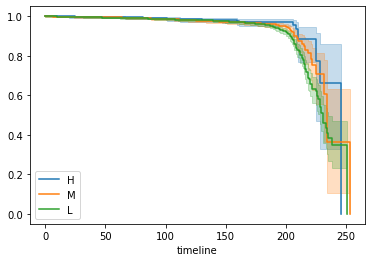

In [24]:
# Instantiate a KaplanMeierFitter object kmf
kmf = KaplanMeierFitter()

# Fit kmf to high group
kmf.fit(durations=high_machine['Tool wear [min]'], event_observed=high_machine['Target'], label='H')

# Create a plot of the survival function
surv_plot = kmf.plot_survival_function()

# Fit kmf to other groups
kmf.fit(durations=medium_machine['Tool wear [min]'], event_observed=medium_machine['Target'], label='M')
kmf.plot_survival_function(ax=surv_plot)

kmf.fit(durations=low_machine['Tool wear [min]'], event_observed=low_machine['Target'], label='L')
kmf.plot_survival_function(ax=surv_plot)

# Show plot
plt.show()

In [23]:
kmf_high = KaplanMeierFitter()
kmf_high.fit(durations=high_machine['Tool wear [min]'], event_observed=high_machine['Target'])
print("The median survival duration (min) of high machines: ", kmf_high.median_survival_time_)

kmf_medium = KaplanMeierFitter()
kmf_medium.fit(durations=medium_machine['Tool wear [min]'], event_observed=medium_machine['Target'])
print("The median survival duration (min) of medium machines: ", kmf_medium.median_survival_time_)

kmf_low = KaplanMeierFitter()
kmf_low.fit(durations=low_machine['Tool wear [min]'], event_observed=low_machine['Target'])
print("The median survival duration (min) of low machines: ", kmf_low.median_survival_time_)

The median survival duration (min) of high machines:  246.0
The median survival duration (min) of medium machines:  234.0
The median survival duration (min) of low machines:  231.0


### Hypothesis test of the similarity between types

H0 : High and low machine has the same tool wear mins

P-value: What's the likelihood that the data would've occurred if the null hypothesis were true?

(P ≤ 0.05) >> Statistically significant test result >> means that the test hypothesis is false or should be rejected

In [27]:
# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare patients with and without pericardial effusion
test_results = logrank_test(durations_A = high_machine['Tool wear [min]'],
                               durations_B = low_machine['Tool wear [min]'],
                               event_observed_A = high_machine['Target'],
                               event_observed_B = low_machine['Target'])

# Print out the p-value of log-rank test results
print(test_results.p_value)
test_results.print_summary

0.005651291360261185


<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.66 0.01      7.47>

In [28]:
# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare patients with and without pericardial effusion
test_results = logrank_test(durations_A = high_machine['Tool wear [min]'],
                               durations_B = medium_machine['Tool wear [min]'],
                               event_observed_A = high_machine['Target'],
                               event_observed_B = medium_machine['Target'])

# Print out the p-value of log-rank test results
print(test_results.p_value)
test_results.print_summary

0.10462183115323558


<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.63 0.10      3.26>

In [29]:
# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare patients with and without pericardial effusion
test_results = logrank_test(durations_A = medium_machine['Tool wear [min]'],
                               durations_B = low_machine['Tool wear [min]'],
                               event_observed_A = medium_machine['Target'],
                               event_observed_B = low_machine['Target'])

# Print out the p-value of log-rank test results
print(test_results.p_value)
test_results.print_summary

0.05007462880076568


<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.84 0.05      4.32>

### Conclusion by Type

#### H0: High and low machine has the same tool wear mins
 - P_value = 0.00565 
 - P ≤ 0.05 >> Statistically significant test result >> High and low machine DON'T have the same tool wear mins
 
#### H0: High and medium machine has the same tool wear mins
 - P_value = 0.104
 - P > 0.05 >> Not statistically significant test result >> Cannot reject "High and medium machine has the same tool wear mins"
 
#### H0: Medium and low machine has the same tool wear mins
 - P_value = 0.05
 - P ≤ 0.05 >> Statistically significant test result >> Medium and low machine DON'T have the same tool wear mins

# Weibull Fitter
Weibull distribution: the failure/event rate is proportional to a power of time.

In [62]:
df_new = df[df['Tool wear [min]'] > 0]
df_new.count()

UDI                        9880
Product ID                 9880
Type                       9880
Air temperature [K]        9880
Process temperature [K]    9880
Rotational speed [rpm]     9880
Torque [Nm]                9880
Tool wear [min]            9880
Target                     9880
Failure Type               9880
dtype: int64

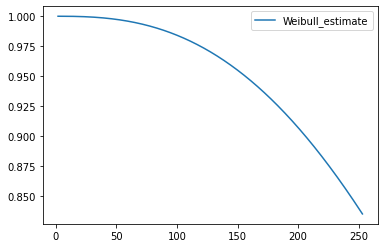

In [66]:
# Import WeibullFitter class
from lifelines import WeibullFitter

# Instantiate WeibullFitter class wb
wb = WeibullFitter()

# Fit data to wb
wb.fit(df_new['Tool wear [min]'], df_new['Target'])

# Plot survival function
wb.survival_function_.plot()
plt.show()

In [67]:
wb.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,487.516436,25.244929,438.037285,536.995588,1.0,19.271848,9.257062e-83,272.509478
rho_,2.612034,0.114838,2.386955,2.837112,1.0,14.037452,9.196011e-45,146.285756


k (or ρ): determines the shape
- k=2.6 (k > 1) the failure/event rate increases over time.

λ: determines the scale (indicates when 63.2% of the population has experienced the event)

In [72]:
# Predicting likelihood of survival
wb.predict(150)

0.9550270632261244

In [73]:
df_new = df_new.drop(columns=['UDI','Product ID','Type','Failure Type'])

In [74]:
df_new

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
5,298.1,308.6,1425,41.9,11,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [76]:
# Import WeibullAFTFitter and instantiate
from lifelines import WeibullAFTFitter
aft = WeibullAFTFitter()

# Fit heart_patients data into aft
aft.fit(df_new, ='Tool wear [min]', event_col='Target')

# Print the summary
aft.summary

coef     exp(coef)  se(coef)  \
param   covariate                                                    
lambda_ Air temperature [K]      -0.218010  8.041173e-01  0.024523   
        Process temperature [K]   0.204934  1.227443e+00  0.032041   
        Rotational speed [rpm]   -0.003152  9.968528e-01  0.000190   
        Torque [Nm]              -0.076822  9.260551e-01  0.004305   
        Intercept                16.323034  1.227449e+07  4.908651   
rho_    Intercept                 0.964676  2.623939e+00  0.043568   

                                 coef lower 95%  coef upper 95%  \
param   covariate                                                 
lambda_ Air temperature [K]           -0.266073       -0.169947   
        Process temperature [K]        0.142134        0.267733   
        Rotational speed [rpm]        -0.003525       -0.002779   
        Torque [Nm]                   -0.085259       -0.068384   
        Intercept                      6.702255       25.943812   
rho_    Intercept                      0.879285        1.050067   

                                 exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                           
lambda_ Air temperature [K]                 0.766383         8.437096e-01   
        Process temperature [K]             1.152732         1.306998e+00   
        Rotational speed [rpm]              0.996481         9.972247e-01   
        Torque [Nm]                         0.918274         9.339018e-01   
        Intercept                         814.239970         1.850352e+11   
rho_    Intercept                           2.409178         2.857844e+00   

                                 cmp to          z              p    -log2(p)  
param   covariate                                                              
lambda_ Air temperature [K]         0.0  -8.890210   6.099343e-19   60.507980  
        Process temperature [K]     0.0   6.395985   1.595158e-10   32.545581  
        Rotational speed [rpm]      0.0 -16.561043   1.332631e-61  202.223336  
        Torque [Nm]                 0.0 -17.844865   3.168673e-71  234.193016  
        Intercept                   0.0   3.325361   8.830424e-04   10.145230  
rho_    Intercept                   0.0  22.142039  1.244769e-108  358.452356

In [77]:
# Calculate the exponential of EPSS coefficient
exp_rotation = np.exp(aft.params_.loc['lambda_'].loc['Rotational speed [rpm]'])
print('When Rotational speed [rpm] increases by 1, the average survival duration changes by a factor of ', exp_rotation)

When Rotational speed [rpm] increases by 1, the average survival duration changes by a factor of  0.9968527610959518


In [78]:
print('When Air temperature [K] increases by 1, the average survival duration changes by a factor of ', 
      np.exp(aft.params_.loc['lambda_'].loc['Air temperature [K]']))

print('When Process temperature [K] increases by 1, the average survival duration changes by a factor of ', 
      np.exp(aft.params_.loc['lambda_'].loc['Process temperature [K]']))

print('When Torque [Nm] increases by 1, the average survival duration changes by a factor of ', 
      np.exp(aft.params_.loc['lambda_'].loc['Torque [Nm]']))

When Air temperature [K] increases by 1, the average survival duration changes by a factor of  0.8041172500631943
When Process temperature [K] increases by 1, the average survival duration changes by a factor of  1.2274434876930636
When Torque [Nm] increases by 1, the average survival duration changes by a factor of  0.9260550968920914


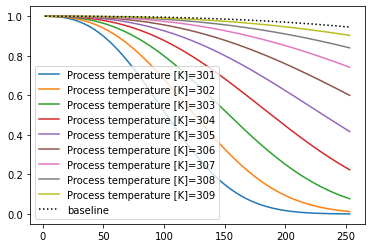

In [90]:
aft.plot_partial_effects_on_outcome(covariates='Process temperature [K]', values=np.arange(301, 310, 1))
plt.show()

# Model Quality

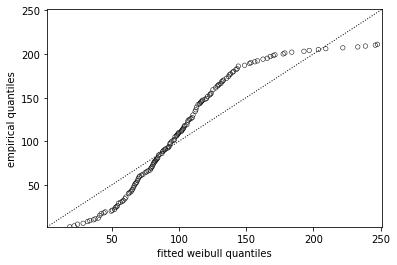

In [80]:
# Import qq_plot
from lifelines.plotting import qq_plot

# Plot qq_plot of wb
qq_plot(wb)

# Display figure
plt.show()

AIC: An estimator of prediction error and relative quality of statistical models for a given
set of data.

Estimates the relative amount of information lost by a given model and penalizes large
number of estimated parameters.
The less information a model loses, the higher the quality of that model.
The fewer parameters (less complex) a model is, the higher the quality of that model.
Given a set of candidate models for the data, the one with the minimum AIC value is the
preferred model.

In [96]:
from lifelines import WeibullFitter
from lifelines import ExponentialFitter
from lifelines import LogNormalFitter
from lifelines import LogLogisticFitter
from lifelines import GeneralizedGammaFitter

# Instantiate each fitter
wb = WeibullFitter()
exp = ExponentialFitter()
log = LogNormalFitter()
logl = LogLogisticFitter()
gamma = GeneralizedGammaFitter()

# Fit to data
for model in [wb, exp, log, logl, gamma]:
    model.fit(df_new['Tool wear [min]'],df_new['Target'])
# Print AIC
    print(model.__class__.__name__, model.AIC_)

WeibullFitter 5772.275397820752
ExponentialFitter 6100.337257025771
LogNormalFitter 5944.620878648259
LogLogisticFitter 5789.288791697798
GeneralizedGammaFitter 5755.778512444061


<lifelines.PiecewiseExponentialFitter:"PiecewiseExponentialFitter: 3 breakpoint", fitted with 9880 total observations, 9544 right-censored observations>


<AxesSubplot:>

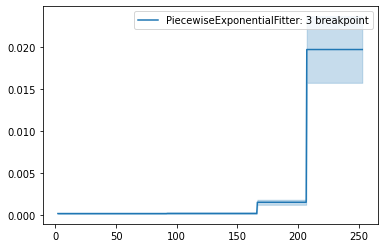

In [102]:
from lifelines.utils import find_best_parametric_model

T = df_new['Tool wear [min]']
E = df_new['Target']

best_model, best_aic_ = find_best_parametric_model(T, E, scoring_method="AIC")

print(best_model)

best_model.plot_hazard()

In [108]:
from lifelines import PiecewiseExponentialFitter

piece = PiecewiseExponentialFitter(breakpoints=[150, 210, 250])
piece.fit(df_new['Tool wear [min]'],df_new['Target'])

piece.AIC_

/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/__init__.py:1024: StatisticalWarning: The diagonal of the variance_matrix_ has negative values or NaNs. This could be a problem with PiecewiseExponentialFitter's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

To fix this, try specifying an `initial_point` kwarg in `fit`.

  warnings.warn(warning_text, exceptions.StatisticalWarning)


5537.827719508132

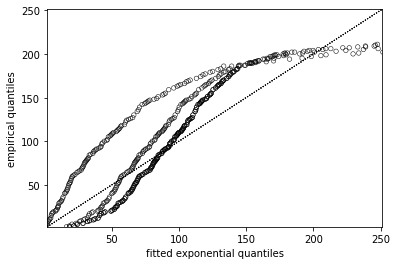

In [110]:
from lifelines.plotting import qq_plot
for model in [WeibullFitter(),LogNormalFitter(),LogLogisticFitter(),ExponentialFitter()]:
    model.fit(df_new['Tool wear [min]'],df_new['Target'])
    qq_plot(model, label = model.__class__.__name__)
plt.show()

# CoxPH Fitter

The proportional hazards assumption: all individuals' hazards are proportional to one another.

In [112]:
# Import CoxPHFitter class
from lifelines import CoxPHFitter

# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

# Fit cph to data
cph.fit(df=df_new, duration_col="Tool wear [min]", event_col="Target")

# Print model summary
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Air temperature [K],0.510276,1.665751,0.057579,0.397423,0.623129,1.487985,1.864753,0.0,8.862176,7.846762e-19,60.144536
Process temperature [K],-0.529046,0.589167,0.077005,-0.679973,-0.378120,0.506631,0.685148,0.0,-6.870315,6.406042e-12,37.183704
Rotational speed [rpm],0.007997,1.008029,0.000341,0.007329,0.008665,1.007356,1.008703,0.0,23.456754,1.127932e-121,401.779620
Torque [Nm],0.198302,1.219331,0.007228,0.184135,0.212469,1.202179,1.236728,0.0,27.435068,1.047197e-165,548.051603


A one unit increase in "Rotational speed [rpm]" from its median value -> the hazards change by the a
factor of e[0.007] = 1.008, which is a 0.8% increase compared to the baseline hazards.

#### The baseline hazards

Hazard ratio: how much hazard increases or decreases relative to baseline hazards.

Baseline hazards: the risk for individuals at the baseline levels of covariates.
- Baseline ≠ setting covariates to 0
- Baseline means setting covariates to their averages (median for lifelines )

Hazard ratio: e , how much hazard changes relative to the average individual when covariates change.

- Rotational speed [rpm] coef = 0.007997
- Hazard ratio e[x] = 1.008029 = 1.008029
- Hazards interpretation e[x] − 1 = 1.008029-1 = 0.008029 >> 0.8% increase in hazards
- Survival time interpretation 1/e[x] - 1 = 1/1.008029 - 1 = -0.0079650 = 0.79% decrease in survival time

Hazard ratio: e , how much hazard changes relative to the average individual when covariates change.
- Air temperature [K] coef = 0.510276
- Hazard ratio e[x] = 1.665751
- Hazards interpretation e[x] − 1 = 1.665751-1 = 0.665751 >> 66.5% increase in hazards
- Survival time interpretation 1/e[x] - 1 = 1/1.665751 - 1 = -0.3996701 = 39.96% decrease in survival time